#Hello Flapjack

Hello everyone and welcome to the SEED 2021 FlapJack tutorial.

In this notebook we will review some of the FlapJack API utilities.

Please visit our weapp at: http://flapjack.rudge-lab.org/

FlapJack API is a tool to use FlapJack in your coding environment to allow automation and customization. This also gives you an new way to interact with data.

#Setup

In [ ]:
!pip install git+https://github.com/SynBioUC/flapjack.git --quiet

In [ ]:
#uncomment when this work
!pip install git+https://github.com/SynBioUC/LOICA.git --quiet

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
% cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
#uncomment if you dont have LOICA cloned in your drive or to update it
#!git clone https://github.com/SynBioUC/LOICA.git

In [ ]:
% cd LOICA/

/content/gdrive/My Drive/LOICA


In [ ]:
!pip install -e .

Obtaining file:///content/gdrive/My%20Drive/LOICA
  Found existing installation: loica 0.0
    Can't uninstall 'loica'. No files were found to uninstall.
  Running setup.py develop for loica


In [ ]:
from flapjack import *
from loica import *

import numpy as np
import getpass
import datetime
import random as rd
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

#Login

In [ ]:
user = input()
passwd = getpass.getpass()
fj = Flapjack('flapjack.rudge-lab.org:8000')
fj.log_in(username=user, password=passwd)

Gonza10V
··········


In [ ]:
dna = fj.get('dna', name='Rep')
if len(dna)==0:
    dna = fj.create('dna', name='Rep')
    
vector = fj.get('vector', name='Rep')    
if len(vector)==0:
    vector = fj.create('vector', name='Rep', dnas=dna.id)
    
cfp = fj.get('signal', name='CFP')

yfp = fj.get('signal', name='YFP')

rfp = fj.get('signal', name='RFP')

media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
    
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')

biomass_signal = fj.get('signal', name='OD')

# Reproducing Web GUI workflow

## Data Exploration and Visualization

### pAAA SBOL Visual diagram



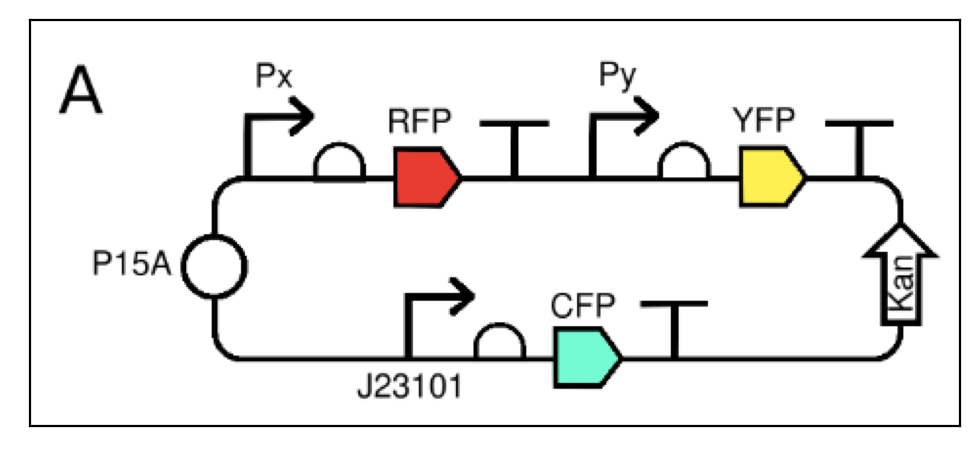

In [ ]:
plt.figure(dpi=200)
plt.xticks([])
plt.yticks([])
plt.imshow(mpimg.imread('./3TUs.png'))

### Plotting pAAA raw data

As well as using the Flapjack webapp (https://github.com/SynBioUC/flapjack_frontend/wiki/Context-effects-on-gene-expression-levels), you can obtain this figure using the Flapjack Python package. Filter the data to select: 
* study: "Context effects", 
* vector (plasmid): "pAAA",
* strain: "MG1655z1",
* media: "M9-glucose"

To compare between measurements we can group the data by Vector (subplots), and "Signal" (lines). In order to compare different data with various magnitudes we normalize, here by the min/max of the measurements for each sample. 

* normalize='Min/Max',
* subplots='Vector',
* markers='Signal',
* plot='Mean'

In [ ]:
# Get objects ids
study_id = fj.get('study', name='Context effects').id
vector_id = fj.get('vector', name='pAAA').id
strain_id = fj.get('strain', name='MG1655z1').id
media_id = fj.get('media', name='M9-glucose').id

# Query and plot data using Python package
fig = fj.plot(study=study_id,
              vector=vector_id,
              strain=strain_id,
              media=media_id,
              normalize='Min/Max',
              subplots='Vector',
              markers='Signal',
              plot='Data')  #change between Mean and Data

fig

100%|██████████| 100/100 [00:00<00:00, 125.92it/s]


## Data Analysis

### Plotting pAAA expression rates

To analyze the behaviour of the TUs in more detail we can compute reporters expression rate (or synthesis rate) using the direct method (Zulkower et al., 2015). To do this, we add filters to the method used above (fj.plot()):

* type='Expression Rate (direct)'
* degr=0,
* eps_L=1e-7
* biomass_signal=biomass_signal_id

In [ ]:
# Get OD id
biomass_signal_id = fj.get('signal', name='OD').id[0]

# Query and plot data using Python package
fig = fj.plot(study=study_id,
              vector=vector_id,
              strain=strain_id,
              media=media_id,              
              type='Expression Rate (direct)',
              degr=0,
              eps_L= 1e-7,#1e-5,
              biomass_signal=biomass_signal_id,
              normalize='Mean/std',
              subplots='Vector',
              markers='Signal',
              plot='Mean')

fig

100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


You can use different algorithms to analyze your data, now we will see our newest advance in characterization using inverse problems.
https://www.biorxiv.org/content/10.1101/2021.03.16.435606v1

In [ ]:
# Get OD id
biomass_signal_id = fj.get('signal', name='OD').id[0]

# Query and plot data using Python package
fig = fj.plot(study=study_id,
              vector=vector_id,
              strain=strain_id,
              media=media_id,              
              type='Expression Rate (inverse)',
              degr=0,
              eps_L=1e-2,
              biomass_signal=biomass_signal_id,
              normalize='Mean/std',
              subplots='Vector',
              markers='Signal',
              plot='Mean')

fig

100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


In [ ]:
# Modify width and size
fig = flapjack.layout_print(fig, width=1.65, height=1.1, font_size=SMALL_SIZE)
fig

### Repressors Characterization with induction curves

As well as using the Flapjack webapp (https://github.com/SynBioUC/flapjack_frontend/wiki/dCas9-Inverters), you can obtain the figure 7B using the Flapjack Python package. Filter the data to select:

* study: "dCas9 Inverters",
* vector (plasmid): 'CcaT+TMA2','CcaT+TMA4','CcaT+TMA5',
To plot all points and not just the mean, select 'All data points' in plot:

* normalize='None',
* subplots='Signal',
* markers='Vector',
* plot='All data points'

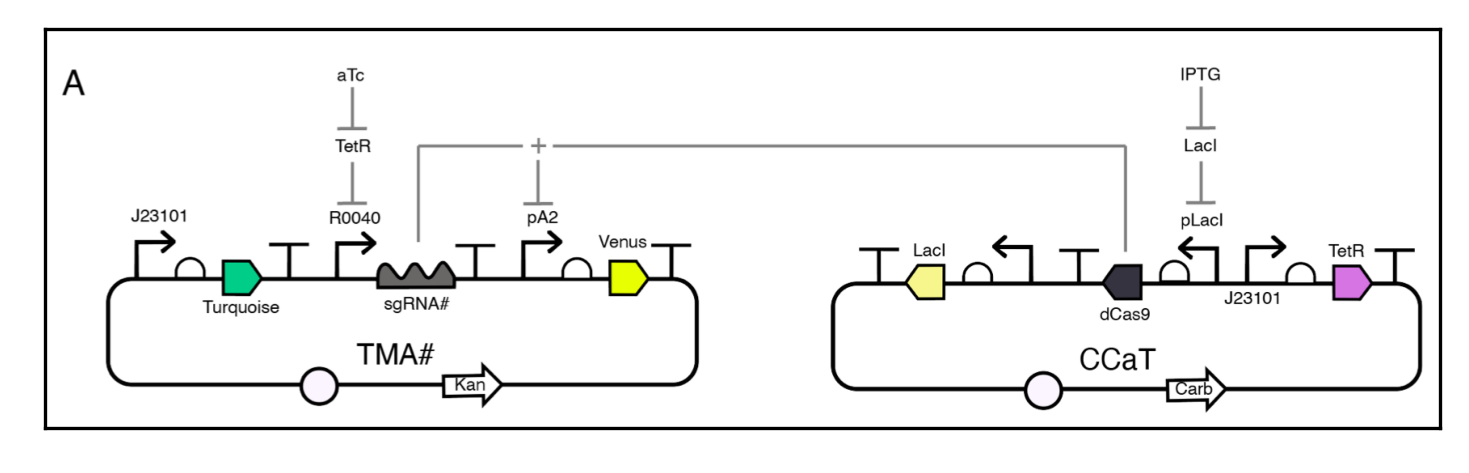

In [ ]:
plt.figure(dpi=300)
plt.xticks([])
plt.yticks([])
plt.imshow(mpimg.imread('./invs.png'))

In [ ]:
study_id = fj.get('study', name='dCas9 Inverters').id
vector_names = ['CcaT+TMA2','CcaT+TMA4','CcaT+TMA5']
vector_ids = [fj.get('vector', name=v).id for v in vector_names]
iptg_id = fj.get('chemical', name='IPTG').id
biomass_signal_id = fj.get('signal', name='OD').id[0]

In [ ]:
fig = fj.plot(study=study_id,                     
                vector=vector_ids,
                type='Induction Curve',
                analyte=iptg_id,
                function='Mean Expression',
                biomass_signal=biomass_signal_id,
                normalize='None',
                subplots='Signal',
                markers='Vector',
                plot='All data' # Change between All data points and Mean
       )
fig

100%|██████████| 100/100 [00:10<00:00,  9.68it/s]


In [ ]:
# Modify width and size (optional)
fig = flapjack.layout_print(fig, width=4.5, height=1.5, font_size=6)
fig.update_xaxes(tickangle=30)
fig

In [ ]:
params = pd.DataFrame()
for vec in vector_names:
    vector_id = fj.get('vector', name=vec).id
    df = fj.analysis(vector=vector_id,
                     analyte=iptg_id,
                     type='Induction Curve',
                     function='Mean Expression',
                     biomass_signal=biomass_signal_id
                    )
    for sig in ['YFP', 'CFP']:
        data = df[df.Signal==sig]
        p,std = flapjack.fit_curve(
            flapjack.hill, 
            data, 
            x='Concentration', y='Expression',
            bounds=[[0,0,0,0], [1e6,1e6,1e-3,4]]
        )
        params = params.append({
            'Vector': vec, 
            'Signal': sig,
            'a': p[0],
            'b': p[1],
            'K': p[2],
            'n': p[3],
        }, ignore_index=True) 
        #[(vec, sig)] = p, std
    sig = 'OD'
    data = df[df.Signal==sig]
    p,std = flapjack.fit_curve(
        flapjack.hill, 
        data, 
        x='Concentration', y='Expression',
        bounds=[[0,0,0,0], [2,2,1e-3,4]]
    )
    params = params.append({
        'Vector': vec, 
        'Signal': sig,
        'a': p[0],
        'b': p[1],
        'K': p[2],
        'n': p[3],
    }, ignore_index=True) 
    #params[(vec, sig)] = p, std

100%|██████████| 100/100 [00:06<00:00, 15.14it/s]


Returning dataframe


100%|██████████| 100/100 [00:02<00:00, 35.42it/s]


Returning dataframe


100%|██████████| 100/100 [00:05<00:00, 18.68it/s]


Returning dataframe


$\langle y^* \rangle = \frac{a ([IPTG]/K)^{n} + b}{1 + ([IPTG]/K)^{n}}$

where $\langle y^* \rangle$ is the time-averaged background-corrected fluorescence, $a$ is the maximum expression level, $b$ is the basal expression level, $K$ is the switching concentration of IPTG, and $n$ is the Hill coefficicent determining the sharpness of the induction.

In [ ]:
params

,K,Signal,Vector,a,b,n
0,0.000006,YFP,CcaT+TMA2,1511.446066,30450.789717,2.690595
1,0.000076,CFP,CcaT+TMA2,1443.253319,7423.001910,1.720108
2,0.000047,OD,CcaT+TMA2,0.075680,0.331293,1.742727
3,0.000007,YFP,CcaT+TMA4,2240.918194,95913.312315,1.827361
4,0.000053,CFP,CcaT+TMA4,1426.359989,7731.431813,1.496716
5,0.000045,OD,CcaT+TMA4,0.056179,0.312614,2.041928
6,0.000001,YFP,CcaT+TMA5,808.370494,148088.420788,1.362828
7,0.000076,CFP,CcaT+TMA5,1504.050884,7617.202941,1.723502
8,0.000054,OD,CcaT+TMA5,0.060753,0.326101,1.924744


#Extending Flapjack utilities

As a first approach to the overall dynamics of a genetic circuit is to take the mean level of expression, as approximated by the signal detected in the assay. This allows us to compare the average rates of gene expression.

In [ ]:
#od = fj.get('signal', name='OD')
#cfp = fj.get('signal', name='CFP')
study = fj.get('study', name=['Context effects'])
exp = fj.analysis(study=study.id,
                    type='Mean Expression',
                    biomass_signal=biomass_signal_id#od.id[0]
                      )

In [ ]:
nexp = pd.DataFrame()
for samp, data in exp.groupby('Sample'):
    yfp = data[data.Signal=='YFP']['Expression'].values
    rfp = data[data.Signal=='RFP']['Expression'].values
    cfp = data[data.Signal=='CFP']['Expression'].values
    data.loc[data.Signal=='YFP', ['Expression']] = yfp/cfp
    data.loc[data.Signal=='RFP', ['Expression']] = rfp/cfp
    nexp = nexp.append(data)

In [ ]:
nexp

,Sample,Signal,Signal_id,Color,Expression,Time,Assay,Study,Media,Strain,Vector,Supplement1,Chemical1,Chemical_id1,Concentration1,Row,Column,Supplement,Chemical,Chemical_id
0,324.0,CFP,6.0,cyan,25719.385309,0.234444,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,[None]
1,324.0,OD,5.0,black,0.606905,0.194444,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,[None]
2,324.0,RFP,8.0,red,2.701484,0.206389,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,[None]
3,324.0,YFP,7.0,yellow,8.438179,0.220278,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,[None]
0,325.0,CFP,6.0,cyan,25622.210052,0.234444,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,[None]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2728.0,YFP,7.0,yellow,7.115176,0.220278,RFP/YFP flip rep3 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAAF,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,[None]
0,2729.0,CFP,6.0,cyan,134321.893041,0.234444,RFP/YFP flip rep3 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAAF,NaN,NaN,NaN,NaN,6.0,7.0,NaN,NaN,[None]
1,2729.0,OD,5.0,black,0.720222,0.194444,RFP/YFP flip rep3 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAAF,NaN,NaN,NaN,NaN,6.0,7.0,NaN,NaN,[None]
2,2729.0,RFP,8.0,red,2.438346,0.206389,RFP/YFP flip rep3 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAAF,NaN,NaN,NaN,NaN,6.0,7.0,NaN,NaN,[None]


Create a heatmap of gene expression in each condition by pivoting the dataframe:

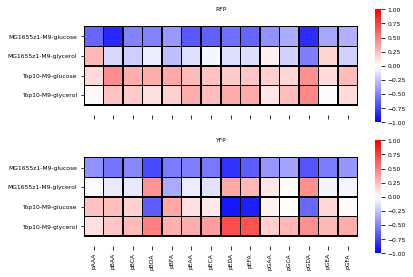

In [ ]:
fig,ax = plt.subplots(2,1, sharex=True, )
for i,name in enumerate(['RFP', 'YFP']):
    df_x = nexp[nexp['Signal']==name].copy()
    df_heatmap = df_x.pivot_table(values='Expression',
                                index=['Strain', 'Media'],
                                columns='Vector', aggfunc=np.mean)
    # drop pAAAF
    if 'pAAAF' in df_heatmap.columns:
        df_heatmap = df_heatmap.drop('pAAAF', axis=1)
    # Normalize to mean of columns
    df_heatmap = df_heatmap / df_heatmap.mean()
    # Alternative Normalize rows to mean
    #df_heatmap = df_heatmap.div( df_heatmap.mean(axis=1), axis=0 )
    # Take log of normalized values
    df_heatmap = df_heatmap.apply(np.log2)
    
    # Plot heatmap
    sns.heatmap(df_heatmap, annot=False, ax=ax[i], 
                square=True, 
                cmap='bwr', 
                center=0,
                #clim=[-1,1],
                vmin=-1, vmax=1, 
                facecolor='gray',
                linewidths=0.5, linecolor='black')
    # Format plot
    bottom, top = ax[i].get_ylim()
    ax[i].set_ylim(bottom + 0.5, top - 0.5)
    ax[i].set_title(name)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    #plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.xticks(rotation=90)
    plt.title(name)
plt.tight_layout()
plt.savefig('heatmap_rpus.png', dpi=300, bbox_inches='tight')

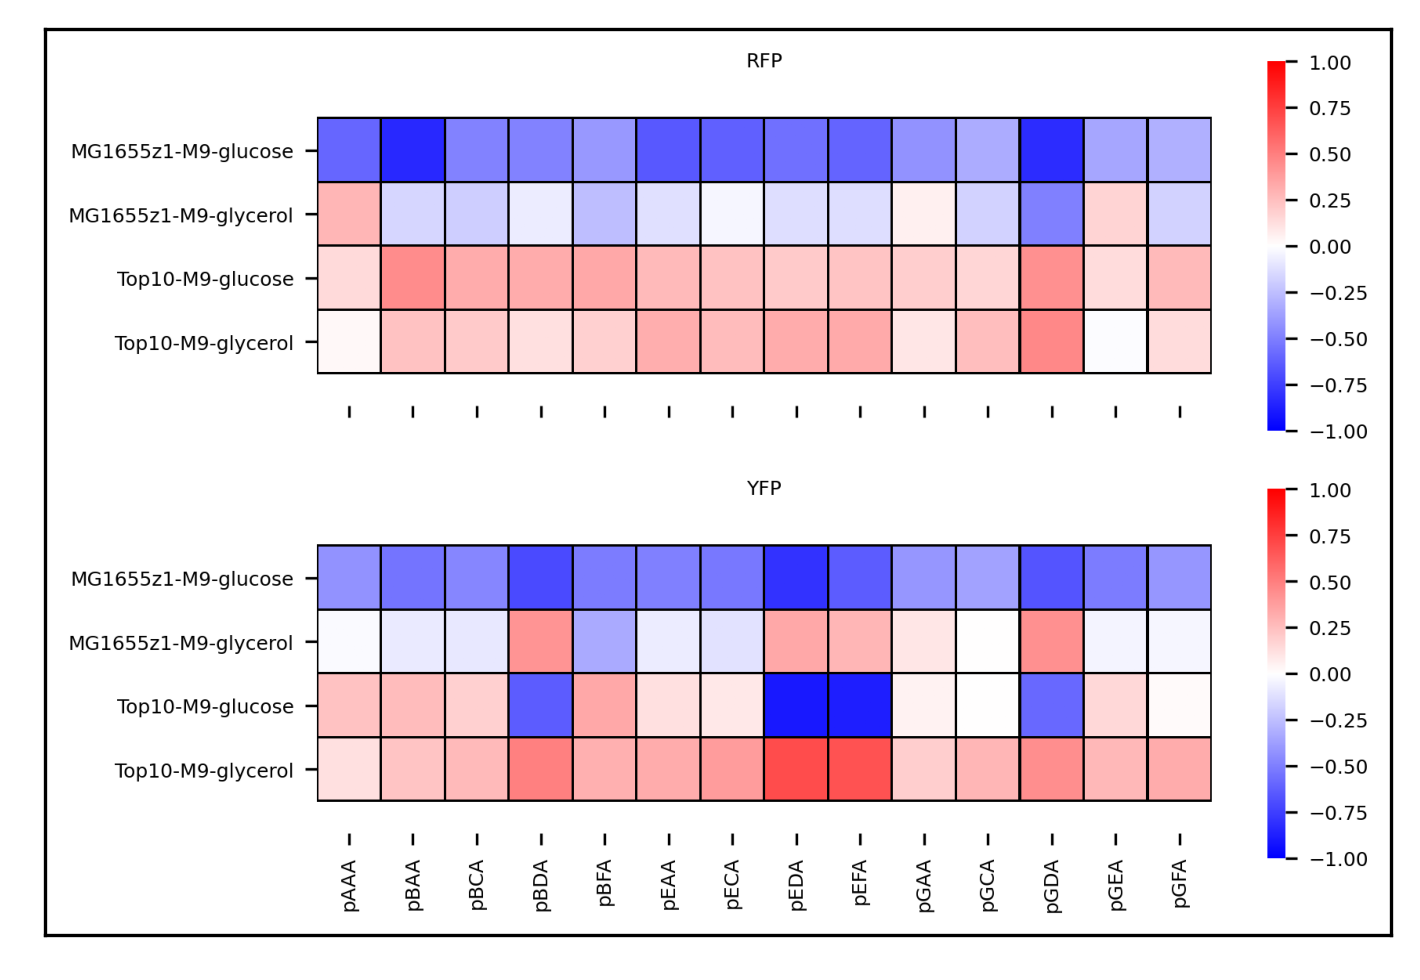

In [ ]:
plt.figure(dpi=300)
plt.xticks([])
plt.yticks([])
plt.imshow(mpimg.imread('./heatmap_rpus.png'))

Fold changes in mean expression for 14 plasmids in different chassis and media.

In [ ]:
df_heatmap

Vector                    pAAA      pBAA  ...      pGEA      pGFA
Strain   Media                            ...                    
MG1655z1 M9-glucose  -0.424345 -0.539716  ... -0.511137 -0.406753
         M9-glycerol -0.019230 -0.082701  ... -0.041448 -0.031415
Top10    M9-glucose   0.236191  0.259400  ...  0.153536  0.018656
         M9-glycerol  0.124573  0.227525  ...  0.280194  0.326773

[4 rows x 14 columns]

#Integrating SBOL 

In [ ]:
pip install pysbol

In [ ]:
import sbol

In [ ]:
#from pysbol import *
from sbol import *

# Some nicer names for display purposes
TU_names = {
    'TU1_1': 'A',
    'TU1_2': 'B',
    'TU1_5': 'E',
    'TU1_8': 'G',
    
    'TU2_1': 'A',
    'TU2_3': 'C',
    'TU2_5': 'E',
    'TU2_6': 'D',
    'TU2_7': 'F',
}

# The URI of "Engineered region" used to encode the TUs
TU_role = 'http://identifiers.org/so/SO:0000804'

df = nexp.copy()
vectors = df.Vector.unique()

synbiouc = sbol.PartShop('3.128.232.8:7777') #doesnt work with rudge-lab.org

result = pd.DataFrame()
rows_to_add = []
for vector in vectors:
    vec = fj.get('vector', name=[vector])
    dna_id = vec.dnas[0]
    dna = fj.get('dna', id=[dna_id])
    sboluri = dna.sboluri[0]
    data = df[df.Vector==vec.name[0]]

    if sboluri!='':
        # Create a new SBOL document
        doc = Document()
        synbiouc.pull(sboluri, doc)
        plasmid = doc.componentDefinitions[sboluri]
        composition = plasmid.getPrimaryStructure()
        TUs = [component.displayId for component in composition \
                       if TU_role in component.roles]
        # The first TU is the RFP TU
        data = data.assign(rfp_tu=TU_names[TUs[0]])
        
        # The second TU is the YFP TU
        data = data.assign(yfp_tu=TU_names[TUs[1]])
        rows_to_add.append(data)
    else:
        print(f"Vector {vector} does not have SBOL URI")

df = result.append(rows_to_add)

Vector pAAAF does not have SBOL URI


In [ ]:
df

,Sample,Signal,Signal_id,Color,Expression,Time,Assay,Study,Media,Strain,Vector,Supplement1,Chemical1,Chemical_id1,Concentration1,Row,Column,Supplement,Chemical,Chemical_id,rfp_tu,yfp_tu
0,324.0,CFP,6.0,cyan,25719.385309,0.234444,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,[None],A,A
1,324.0,OD,5.0,black,0.606905,0.194444,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,[None],A,A
2,324.0,RFP,8.0,red,2.701484,0.206389,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,[None],A,A
3,324.0,YFP,7.0,yellow,8.438179,0.220278,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,[None],A,A
0,325.0,CFP,6.0,cyan,25622.210052,0.234444,K1 rep1 MG1655z1,Context effects,M9-glucose,MG1655z1,pAAA,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,[None],A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2624.0,YFP,7.0,yellow,1.024516,0.220278,K4 rep3 Top10,Context effects,M9-glucose,Top10,pBFA,NaN,NaN,NaN,NaN,8.0,11.0,NaN,NaN,[None],B,F
0,2625.0,CFP,6.0,cyan,15122.809278,0.234444,K4 rep3 Top10,Context effects,M9-glucose,Top10,pBFA,NaN,NaN,NaN,NaN,8.0,12.0,NaN,NaN,[None],B,F
1,2625.0,OD,5.0,black,0.503954,0.194444,K4 rep3 Top10,Context effects,M9-glucose,Top10,pBFA,NaN,NaN,NaN,NaN,8.0,12.0,NaN,NaN,[None],B,F
2,2625.0,RFP,8.0,red,1.386835,0.206389,K4 rep3 Top10,Context effects,M9-glucose,Top10,pBFA,NaN,NaN,NaN,NaN,8.0,12.0,NaN,NaN,[None],B,F


#Integrating LOICA

LOICA is a Python package for genetic circuit modelling and design.

## Repressilator

###Get or Create FlapJack data objects

In [ ]:
dna = fj.get('dna', name='Rep')
if len(dna)==0:
    dna = fj.create('dna', name='Rep')
vector = fj.get('vector', name='Rep')    
if len(vector)==0:
    vector = fj.create('vector', name='Rep', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
cfp = fj.get('signal', name='CFP')
yfp = fj.get('signal', name='YFP')
rfp = fj.get('signal', name='RFP')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)
    

###GeneticNetwork construction

In [ ]:
rep = GeneticNetwork(vector=vector.id[0])

laci = Regulator(name='LacI', degradation_rate=1, init_concentration=5)
tetr = Regulator(name='TetR', degradation_rate=1)
ci = Regulator(name='cI', degradation_rate=1)
rep.add_regulator(laci)
rep.add_regulator(tetr)
rep.add_regulator(ci)

sfp1 = Reporter(name='CFP', degradation_rate=1, signal_id=cfp.id[0])
rep.add_reporter(sfp1)
sfp2 = Reporter(name='YFP', degradation_rate=1, signal_id=yfp.id[0])
rep.add_reporter(sfp2)
sfp3 = Reporter(name='RFP', degradation_rate=1, signal_id=rfp.id[0])
rep.add_reporter(sfp3)

rep.add_operator(Not(input=ci, output=laci, a=100, b=0, K=1, n=2))
rep.add_operator(Not(input=laci, output=tetr, a=100, b=0, K=1, n=2))
rep.add_operator(Not(input=tetr, output=ci, a=100, b=0, K=1, n=2))

rep.add_operator(Not(input=ci, output=sfp1, a=100, b=0, K=1, n=2))
rep.add_operator(Not(input=laci, output=sfp2, a=100, b=0, K=1, n=2))
rep.add_operator(Not(input=tetr, output=sfp3, a=100, b=0, K=1, n=2))

###Assay setup

In [ ]:
metab = SimulatedMetabolism(biomass, growth_rate)

sample = Sample(circuit=rep, 
                metabolism=metab,
                media=media.id[0],
                strain=strain.id[0]
               )
assay = Assay([sample], 
              n_measurements=100, 
              interval=0.25,
              name='Loica repressilator',
              description='Simulated repressilator generated by loica',
              biomass_signal_id=biomass_signal.id[0]
             )
assay.run()

Returning dataframe


In [ ]:
assay.measurements

,Measurement,Sample,Signal,Signal_id,Time
0,0.000000,0.0,CFP,6.0,0.00
1,0.000000,0.0,YFP,7.0,0.00
2,0.000000,0.0,RFP,8.0,0.00
3,0.010347,0.0,Biomass,5.0,0.00
4,0.025701,0.0,CFP,6.0,0.25
...,...,...,...,...,...
395,0.999988,0.0,Biomass,5.0,24.50
396,5.568718,0.0,CFP,6.0,24.75
397,2.908811,0.0,YFP,7.0,24.75
398,6.830986,0.0,RFP,8.0,24.75


###Data uploading

In [ ]:
assay.upload(fj, study.id[0])

### Visualization

In [ ]:
# Query and plot data using Python package
fig = fj.plot(study=study.id,
              vector=vector.id,
              strain=strain.id,
              media=media.id,
              normalize='Min/Max',
              subplots='Vector',
              markers='Signal',
              plot='Mean')  #change between Mean and Data

fig

100%|██████████| 100/100 [00:00<00:00, 129.88it/s]


In [ ]:
# Modify width and size
fig = flapjack.layout_print(fig, width=1.65, height=1.1, font_size=6)
fig

## Logic gates: NOR

###Get or Create Flapjack data objects

In [ ]:
dna_nor = fj.get('dna', name='Nor')
if len(dna)==0:
    dna = fj.create('dna', name='Nor')
vector_nor = fj.get('vector', name='Nor')    
if len(vector)==0:
    vector = fj.create('vector', name='Nor', dnas=dna_nor.id)
cfp = fj.get('signal', name='CFP')

###GeneticNetwork construction

In [ ]:
nor = GeneticNetwork(vector=vector_nor.id[0])

sfp1 = Reporter(name='CFP', degradation_rate=0, signal_id=cfp.id[0])
nor.add_reporter(sfp1)

ahl1 = Supplement(name='AHL1')
ahl2 = Supplement(name='AHL2')
nor.add_operator(Nor(input=[ahl1, ahl2], output=sfp1, alpha=[0.0001,1,1,0],
                     a=[100,70], b=[0.0001,0.001], K=[1,1], n=[2,2]))

###Assay setup

In [ ]:
metab = SimulatedMetabolism(biomass, growth_rate)

# Create list of samples    
samples = []
for conc1 in np.logspace(-3, 3, 8):
    for conc2 in np.logspace(-3,3,8):
        sample = Sample(circuit=nor, 
                metabolism=metab,
                media=media.id[0],
                strain=strain.id[0])
        # Add AHL to samples at given concentration
        sample.add_supplement(ahl1, conc1)
        sample.add_supplement(ahl2, conc2)
        samples.append(sample)
        
assay = Assay(samples, 
              n_measurements=100, 
              interval=0.25,
              name='Loica nor',
              description='Simulated nor generated by loica',
              biomass_signal_id=biomass_signal.id[0]
             )
assay.run()

###Data uploading

In [ ]:
study = fj.get('study', name='Loica NOR SEED')
if len(study)==0:
    study = fj.create('study', name='Loica NOR SEED', description='Loica generated data for SEED 2021')
    
assay.upload(fj, study.id[0])

### Webapp visualization

http://flapjack.rudge-lab.org/